In [421]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [422]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [423]:
data = pd.read_csv('store_data_1.csv',encoding = "ISO-8859-1", header = None) #encoding = "ISO-8859-1"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [424]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [425]:

transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [426]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil']]

In [427]:

from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder().fit(transactions)


onehot = encoder.transform(transactions)


onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1) #drop('NaM', axis=1) #.drop('None', axis=1)


onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [428]:
support = onehot.mean()
support = pd.DataFrame(support, columns=['confidence']).sort_values('confidence',ascending=False)



In [429]:
from mlxtend.frequent_patterns import apriori

mincon=[0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
elaptime=[]
lenres=[]

for confid in mincon:
    t0= time.time()
    result = apriori(onehot, min_support = 0.001, use_colnames = True)
    result = association_rules(result, metric = "confidence", min_threshold = confid)
    print(len(result))
    t1 = time.time()
    print("Time elapsed: ", t1 - t0)
    elaptime.append(t1-t0)
    lenres.append(len(result))
print(elaptime)
print(lenres)


results1 = apriori(onehot, min_support = 0.01, use_colnames = True)
results1 = association_rules(results1, metric = "confidence", min_threshold = 0.001)
# Print a preview of the frequent itemsets
results1 = pd.DataFrame(results1 ).sort_values('support',ascending=False)


results1.head()




200
Time elapsed:  11.960076808929443
96
Time elapsed:  12.754754543304443
52
Time elapsed:  12.125733852386475
29
Time elapsed:  12.023141384124756
11
Time elapsed:  11.941128492355347
5
Time elapsed:  12.890940427780151
[11.960076808929443, 12.754754543304443, 12.125733852386475, 12.023141384124756, 11.941128492355347, 12.890940427780151]
[200, 96, 52, 29, 11, 5]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
299,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
298,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
87,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
86,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
139,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158


In [430]:
forplot=[]
for i in mincon:
  forplot.append(str(i))

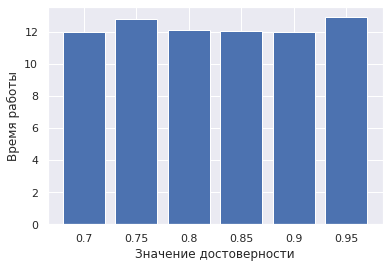

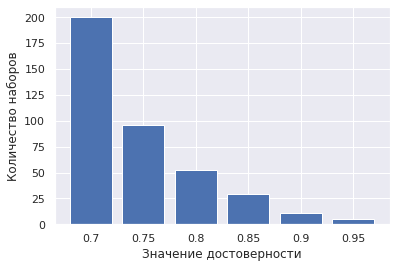

In [431]:
plt.bar(forplot, elaptime)
plt.xlabel("Значение достоверности")
plt.ylabel("Время работы")
plt.show()

plt.bar(forplot, lenres)
plt.xlabel("Значение достоверности")
plt.ylabel("Количество наборов")
plt.show()